In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.cluster import KMeans
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("C:\\Users\\eiti mittal\\Downloads\\happinessindex.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [17]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [18]:
data

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [21]:
data.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [20]:
data.shape

(157, 13)

In [22]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

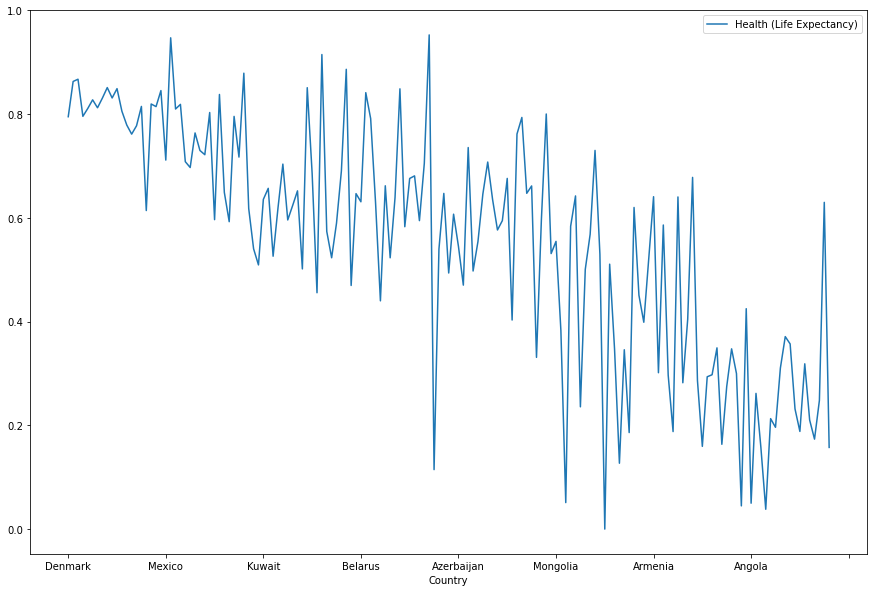

In [6]:
plt.rcParams["figure.figsize"] = (15,10)
data.plot(x="Country", y='Health (Life Expectancy)')
plt.show()

In [7]:
data.groupby(by='Region')['Country'].size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        24
Middle East and Northern Africa    19
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 38
Western Europe                     21
Name: Country, dtype: int64

In [19]:
X = data[[ 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']].values
X[0:5]


array([[1.     , 7.46   , 7.592  , 1.44178, 1.16374, 0.79504, 0.57941,
        0.44453, 0.36171, 2.73939],
       [2.     , 7.428  , 7.59   , 1.52733, 1.14524, 0.86303, 0.58557,
        0.41203, 0.28083, 2.69463],
       [3.     , 7.333  , 7.669  , 1.42666, 1.18326, 0.86733, 0.56624,
        0.14975, 0.47678, 2.83137],
       [4.     , 7.421  , 7.575  , 1.57744, 1.1269 , 0.79579, 0.59609,
        0.35776, 0.37895, 2.66465],
       [5.     , 7.351  , 7.475  , 1.40598, 1.13464, 0.81091, 0.57104,
        0.41004, 0.25492, 2.82596]])

In [9]:
y = data['Happiness Score'].values
y[0:5]

array([7.526, 7.509, 7.501, 7.498, 7.413])

In [20]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.72063475,  1.90286791,  1.86255187,  1.1862989 ,  1.39218336,
         1.03850712,  1.43693006,  2.77282187,  0.89309199,  0.76520031],
       [-1.69856992,  1.87490519,  1.86078644,  1.39430839,  1.32259655,
         1.33590328,  1.47940033,  2.47919242,  0.28647245,  0.68238663],
       [-1.6765051 ,  1.79189084,  1.93052095,  1.14953556,  1.46560684,
         1.35471198,  1.34612917,  0.10955759,  1.7561448 ,  0.93537909],
       [-1.65444027,  1.86878834,  1.84754571,  1.51614773,  1.25361158,
         1.04178771,  1.55193073,  1.98887641,  1.02239616,  0.62691849],
       [-1.63237545,  1.80761988,  1.75927417,  1.09925343,  1.2827252 ,
         1.10792434,  1.37922289,  2.46121326,  0.09214119,  0.92536966]])

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (125, 10) (125,)
Test set: (32, 10) (32,)


In [60]:
kmeans = KMeans(n_clusters=3)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=3, n_jobs=None, precompute_distances='auto')

In [61]:
label = kmeans.fit_predict(X)
print(label)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [57]:
predict = kmeans.predict(X)
data['cluster'] = predict
#pd.plotting.parallel_coordinates(data, 'cluster')


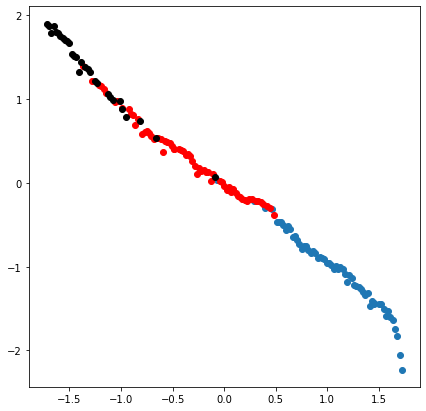

In [63]:
plt.figure(figsize=(7,7))
filtered_label0 = X[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
filtered_label1 = X[label == 1]
 
filtered_label2 =X[label == 2]
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black')
plt.show()